# Wordnet

Wordnet visualization.

Imports:

In [1]:
# imports
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import networkx as nx


Function to create the graph:

In [2]:
# function to create graph
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
     
            for s1 in fn(s):
                
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph

In [3]:
synsets = wn.synsets('university')
synsets


[Synset('university.n.01'),
 Synset('university.n.02'),
 Synset('university.n.03')]

In [4]:
iword = synsets[0]


graph = closure_graph(iword, lambda s: s.hypernyms())

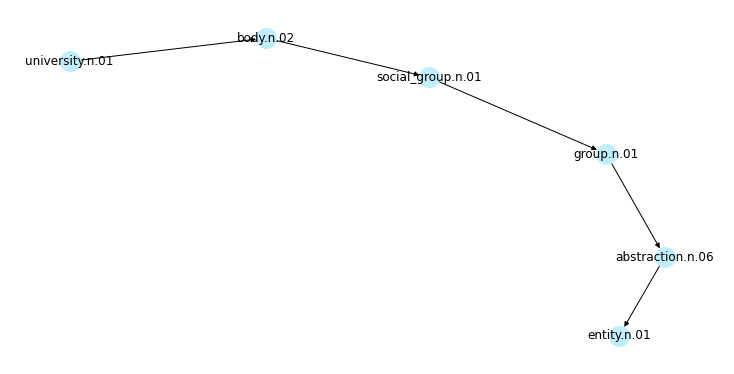

In [5]:
# nx.draw_graphviz(graph)
# %matplotlib notebook

plt.figure(figsize=(10,5))

nx.draw(graph, with_labels=True, node_size=400,font_size=12, node_color='#BFEEFF')

# plt.show()

# larger figure size
# plt.figure(3,figsize=(12,12)) 

plt.show()

In [6]:
print(wn.synset(iword.name()).definition())

the body of faculty and students at a university
